In [3]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
from qiskit import Aer
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import state_fidelity
import numpy as np

In [4]:
n = 4

#M = 4 #Exata
M = np.round(np.log2(n)) #Aproximada
#M = 3 #Arbitrariamente aproximada

print('n = ', n)
print('M = ', M)

#QTF
def QFT(n, M, j):
    Q = QuantumRegister(n)
    circuito = QuantumCircuit(Q)
    
    if np.linalg.norm(j) == 1:       
        circuito.initialize(j, Q)

    for m in range(n - 1, -1, -1):
        circuito.h(Q[m])

        for k in range(m):
            if m - k < M:
                circuito.cp(np.pi/2**(m - k), Q[k], Q[m])

    for k in range(n//2):
        circuito.swap(Q[k], Q[n - k - 1])
        
    return circuito

#QTF'
def iQFT(n, m, j):
    Q = QuantumRegister(n)
    circuito = QuantumCircuit(Q)
    
    if np.linalg.norm(j) == 1:       
        circuito.initialize(j, Q)

    for k in range(n//2):
        circuito.swap(Q[k], Q[n - k - 1])

    for m in range(n):
        for k in range(m, -1, -1):
            if k != m:
                if m - k < M:
                    circuito.cp(-np.pi/2**(m - k), Q[k], Q[m])          
        circuito.h(Q[m])
        
    return circuito

n =  4
M =  2.0


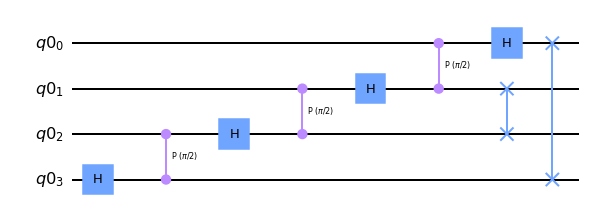

In [5]:
#QFT
circuito = QFT(n, M, 0)
circuito.draw(output='mpl')

In [6]:
backend = Aer.get_backend('unitary_simulator')
job = backend.run(circuito)
result = job.result()
print(result.get_unitary(circuito, decimals=3))

Operator([[ 0.25+0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,
            0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,
            0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,
            0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ],
          [ 0.25+0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,
            0.  +0.25j,  0.  +0.25j,  0.  +0.25j,  0.  +0.25j,
           -0.25+0.j  , -0.25+0.j  , -0.25+0.j  , -0.25+0.j  ,
           -0.  -0.25j, -0.  -0.25j, -0.  -0.25j, -0.  -0.25j],
          [ 0.25+0.j  ,  0.25-0.j  ,  0.  +0.25j,  0.  +0.25j,
           -0.25+0.j  , -0.25+0.j  , -0.  -0.25j, -0.  -0.25j,
            0.25-0.j  ,  0.25-0.j  ,  0.  +0.25j,  0.  +0.25j,
           -0.25+0.j  , -0.25+0.j  , -0.  -0.25j, -0.  -0.25j],
          [ 0.25+0.j  ,  0.25-0.j  ,  0.  +0.25j,  0.  +0.25j,
           -0.  -0.25j, -0.  -0.25j,  0.25-0.j  ,  0.25-0.j  ,
           -0.25+0.j  , -0.25+0.j  , -0.  -0.25j, -0.  -0.25j,
            0.  +0.25j,  0.  +0.25j, -0.25+0.j  , -0

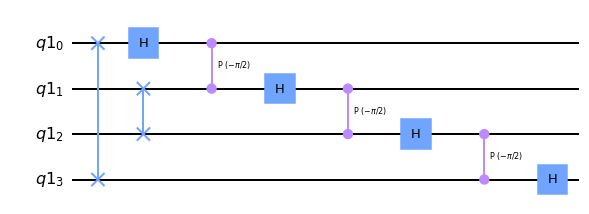

In [7]:
#QTF'
circuito = iQFT(n, M, 0)
circuito.draw(output='mpl')

In [8]:
backend = Aer.get_backend('unitary_simulator')
job = backend.run(circuito)
result = job.result()
print(result.get_unitary(circuito, decimals=3))

Operator([[ 0.25+0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,
            0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,
            0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,
            0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ],
          [ 0.25+0.j  ,  0.25-0.j  ,  0.25-0.j  ,  0.25-0.j  ,
           -0.  -0.25j, -0.  -0.25j, -0.  -0.25j, -0.  -0.25j,
           -0.25+0.j  , -0.25+0.j  , -0.25+0.j  , -0.25+0.j  ,
            0.  +0.25j,  0.  +0.25j,  0.  +0.25j,  0.  +0.25j],
          [ 0.25+0.j  ,  0.25-0.j  , -0.  -0.25j, -0.  -0.25j,
           -0.25+0.j  , -0.25+0.j  ,  0.  +0.25j,  0.  +0.25j,
            0.25-0.j  ,  0.25-0.j  , -0.  -0.25j, -0.  -0.25j,
           -0.25+0.j  , -0.25+0.j  ,  0.  +0.25j,  0.  +0.25j],
          [ 0.25+0.j  ,  0.25-0.j  , -0.  -0.25j, -0.  -0.25j,
            0.  +0.25j,  0.  +0.25j,  0.25-0.j  ,  0.25-0.j  ,
           -0.25+0.j  , -0.25+0.j  ,  0.  +0.25j,  0.  +0.25j,
           -0.  -0.25j, -0.  -0.25j, -0.25+0.j  , -0

In [9]:
#Estado arbitrário
jo = np.zeros(2**n, dtype = 'complex_')
jo[15] = 1
print('jo = ', jo)

jo =  [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [10]:
#QTF
circuito = QFT(n, M, jo)

back_vector = Aer.get_backend('statevector_simulator')
job_vector = execute(circuito, back_vector)
resultado = job_vector.result()
vector = resultado.get_statevector(circuito, decimals=10)

print('k = ', vector)

k =  Statevector([ 0.25-0.j  , -0.  -0.25j, -0.  -0.25j, -0.25+0.j  ,
             -0.  -0.25j, -0.25+0.j  , -0.25+0.j  ,  0.  +0.25j,
             -0.25+0.j  ,  0.  +0.25j,  0.  +0.25j,  0.25-0.j  ,
              0.  +0.25j,  0.25-0.j  ,  0.25-0.j  , -0.  -0.25j],
            dims=(2, 2, 2, 2))


In [11]:
#QTF'
circuito = iQFT(n, M, jo)

back_vector = Aer.get_backend('statevector_simulator')
job_vector = execute(circuito, back_vector)
resultado = job_vector.result()
vector = resultado.get_statevector(circuito, decimals=10)

print('k = ', vector)

k =  Statevector([ 0.25-0.j  ,  0.  +0.25j,  0.  +0.25j, -0.25+0.j  ,
              0.  +0.25j, -0.25+0.j  , -0.25+0.j  , -0.  -0.25j,
             -0.25+0.j  , -0.  -0.25j, -0.  -0.25j,  0.25-0.j  ,
             -0.  -0.25j,  0.25-0.j  ,  0.25-0.j  ,  0.  +0.25j],
            dims=(2, 2, 2, 2))


In [12]:
n = 4
j = np.zeros(2**n)
j[2**n - 1] = 1

#Exata
M = n
circuito = iQFT(n, M, j)
back_vector = Aer.get_backend('statevector_simulator') #statevector_simulator bakend
job_vector = execute(circuito, back_vector)
resultado = job_vector.result()
vector1 = resultado.get_statevector(circuito, decimals=10) #Vetor de estado

#Aproximada
M = np.round(np.log2(n))
circuito = iQFT(n, M, j)
back_vector = Aer.get_backend('statevector_simulator') #statevector_simulator bakend
job_vector = execute(circuito, back_vector)
resultado = job_vector.result()
vector2 = resultado.get_statevector(circuito, decimals=10) #Vetor de estado

#Fidelidade
fidelidade = state_fidelity(vector1, vector2)

print('Exato: ', vector1)
print('Aproximado: ', vector2)
print('Fidelidade = ', fidelidade)

Exato:  Statevector([ 0.25      -0.j        ,  0.23096988+0.09567086j,
              0.1767767 +0.1767767j ,  0.09567086+0.23096988j,
              0.        +0.25j      , -0.09567086+0.23096988j,
             -0.1767767 +0.1767767j , -0.23096988+0.09567086j,
             -0.25      +0.j        , -0.23096988-0.09567086j,
             -0.1767767 -0.1767767j , -0.09567086-0.23096988j,
             -0.        -0.25j      ,  0.09567086-0.23096988j,
              0.1767767 -0.1767767j ,  0.23096988-0.09567086j],
            dims=(2, 2, 2, 2))
Aproximado:  Statevector([ 0.25-0.j  ,  0.  +0.25j,  0.  +0.25j, -0.25+0.j  ,
              0.  +0.25j, -0.25+0.j  , -0.25+0.j  , -0.  -0.25j,
             -0.25+0.j  , -0.  -0.25j, -0.  -0.25j,  0.25-0.j  ,
             -0.  -0.25j,  0.25-0.j  ,  0.25-0.j  ,  0.  +0.25j],
            dims=(2, 2, 2, 2))
Fidelidade =  0.5900970658422702
